['.git', '.ipynb_checkpoints', 'american_sign_language.PNG', 'amer_sign2.png', 'amer_sign3.png', 'sign-language-mnist', 'sign-language-mnist.zip', 'signLanguageTraslation_CNN.ipynb', 'sign_mnist_test.csv', 'sign_mnist_train.csv']
Instructions for updating:
non-resource variables are not supported in the long term
Dataframe Shape: (27455, 785)
Number of images: 27455
Number of pixels in each image: 784
Labels:
 [ 3  6  2 ... 18 17 23]
Shape of Labels: (27455,)


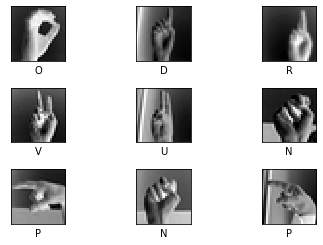

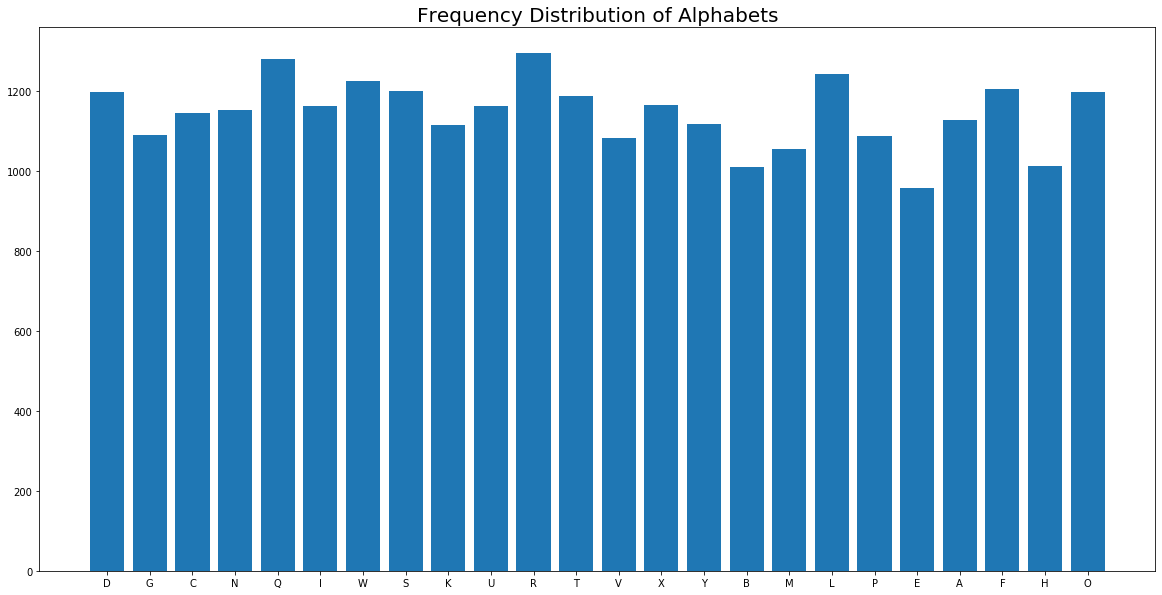

Shape of y after encoding: (27455, 25)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
X train shape (18394, 784)
y train shape (18394, 25)
X test shape (9061, 784)
y test shape (9061, 25)
Epoch 100, Cost: 202543508.875, Accuracy: 32.8125 %
Epoch 200, Cost: 64315143.0, Accuracy: 59.375 %
Epoch 300, Cost: 15184967.09375, Accuracy: 79.6875 %
Epoch 400, Cost: 11628238.46875, Accuracy: 81.25 %
Epoch 500, Cost: 3013430.96875, Accuracy: 92.1875 %
Epoch 600, Cost: 1567942.65625, Accuracy: 92.96875 %
Epoch 700, Cost: 2404750.53125, Accuracy: 91.40625 %
Epoch 800, Cost: 579395.375, Accuracy: 93.75 %
Epoch 900, Cost: 851645.84375, Accuracy: 95.3125 %
Epoch 1000, Cost: 55056.4375, Accuracy: 99.21875 %
Epoch 1100, Cost: 131187.1875, Accuracy: 98.4375 %
Epoch 1200, Cost: 0.0, Accuracy: 100.0 %
Epoch 1300, Cost: 56177.84375, Accuracy: 99.21875 %
Epoch 1400, Cost: 0.0, Accuracy: 100.0 %
Epoch 1500, Cost: 22421.625, Accuracy: 99.21875 

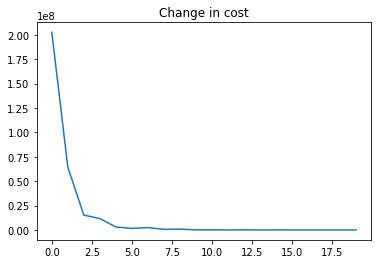

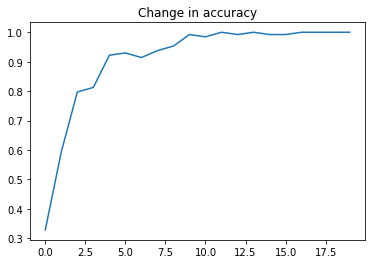

Training on the whole dataset....

Epoch 100, Cost: 121241258.125, Accuracy: 42.1875 %
Epoch 200, Cost: 22414868.625, Accuracy: 74.21875 %
Epoch 300, Cost: 14255344.25, Accuracy: 77.34375 %
Epoch 400, Cost: 5756657.78125, Accuracy: 88.28125 %
Epoch 500, Cost: 2086861.375, Accuracy: 93.75 %
Epoch 600, Cost: 1622208.40625, Accuracy: 92.96875 %
Epoch 700, Cost: 1024616.0625, Accuracy: 95.3125 %
Epoch 800, Cost: 494885.5625, Accuracy: 96.09375 %
Epoch 900, Cost: 298875.03125, Accuracy: 96.875 %
Epoch 1000, Cost: 23974.875, Accuracy: 99.21875 %
Epoch 1100, Cost: 0.0, Accuracy: 100.0 %
Epoch 1200, Cost: 0.0, Accuracy: 100.0 %
Epoch 1300, Cost: 0.0, Accuracy: 100.0 %
Epoch 1400, Cost: 122965.75, Accuracy: 99.21875 %
Epoch 1500, Cost: 0.0, Accuracy: 100.0 %
Epoch 1600, Cost: 0.0, Accuracy: 100.0 %
Epoch 1700, Cost: 0.0, Accuracy: 100.0 %
Epoch 1800, Cost: 0.0, Accuracy: 100.0 %
Epoch 1900, Cost: 0.0, Accuracy: 100.0 %
Epoch 2000, Cost: 0.0, Accuracy: 100.0 %
-----------------------------------

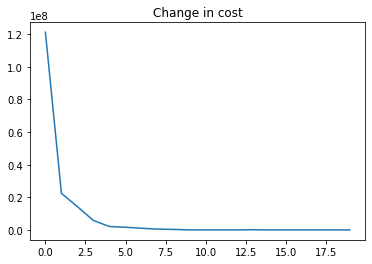

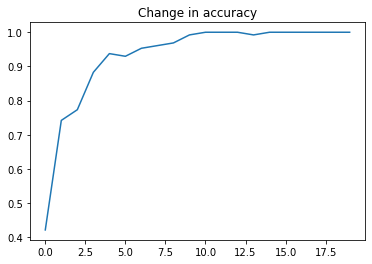

Dataframe Shape: (27455, 785)


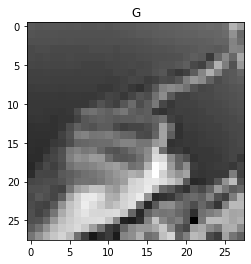

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir())
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
from collections import Counter


# Exploratory Analysis of Training Data
data = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
print('Dataframe Shape:', data.shape)

data.head()

x = data.iloc[:, 1:].values
print("Number of images:", x.shape[0])
print("Number of pixels in each image:", x.shape[1])

y = data.iloc[:, :1].values.flatten()
print('Labels:\n', y)
print('Shape of Labels:', y.shape)

def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def display_images(data):
    x, y = data
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i].reshape(28, 28), cmap = 'binary')
        ax.set_xlabel(chr(y[i] + 65))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

display_images(next_batch(9, x, y))

z = dict(Counter(list(y)))
labels = z.keys()
frequencies = [z[i] for i in labels]
labels = [chr(i + 65) for i in z.keys()]

plt.figure(figsize = (20, 10))
plt.bar(labels, frequencies)
plt.title('Frequency Distribution of Alphabets', fontsize = 20)
plt.show()

def one_hot_encode(y):
    return np.eye(25)[y]
y_encoded = one_hot_encode(y)
print('Shape of y after encoding:', y_encoded.shape)


# building the convolutional Neural Network
# Training Parameters
learning_rate = 0.001
epochs = 2000
batch_size = 128
display_step = 100

# Neural Network Hyperparameters
n_input = 784
n_classes = 25
dropout = 0.75

# Placeholders
X = tf.placeholder(tf.float32, shape = [None, n_input]) # Placeholder for Feature Matrix
Y = tf.placeholder(tf.float32, shape = [None, n_classes]) # Placeholder for Labels
keep_prob = tf.placeholder(tf.float32) # Placeholder for Dropout Rate

weights = {
    # Weight for Convolutional Layer 1: 5x5 filter, 1 input channel, 32 output channels
    'w1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    # Weight for Convolutional Layer 2: 5x5 filter, 32 input channels, 64 output channels
    'w2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # Weight for Fully Connected Layer 1: 49 * 64 input channels, 1024 output channels
    'w3' : tf.Variable(tf.random_normal([7 * 7 * 64, 1024])),
    # Weight for Convolutional Layer 1: 1024 input channels, 25(number of classes) output channels
    'w4' : tf.Variable(tf.random_normal([1024, n_classes]))
}

biases = {
    # Bias for Convolutional Layer 1
    'b1' : tf.Variable(tf.random_normal([32])),
    # Bias for Convolutional Layer 2
    'b2' : tf.Variable(tf.random_normal([64])),
    # Bias for Fully Connected Layer 1
    'b3' : tf.Variable(tf.random_normal([1024])),
    # Bias for Outout Layer
    'b4' : tf.Variable(tf.random_normal([n_classes]))
}

# Wrapper function for creating a Convolutional Layer
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

# Wrapper function for creating a Pooling Layer
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')

def neural_network(x, weight, bias, dropout):
    x = tf.reshape(x, shape = [-1, 28, 28, 1])
    
    conv1 = conv2d(x, weight['w1'], bias['b1']) # Convolutional Layer 1
    conv1 = maxpool2d(conv1) # Pooling Layer 1
    
    conv2 = conv2d(conv1, weight['w2'], bias['b2']) # Convolutional Layer 1
    conv2 = maxpool2d(conv2) # Pooling Layer 1
    
    # Fully Connected Layer 1
    # Reshaping output of previous convolutional layer to fit the fully connected layer
    fc = tf.reshape(conv2, [-1, weights['w3'].get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc, weight['w3']), bias['b3']) # Linear Function
    fc = tf.nn.relu(fc) # Activation Function
    
    fc = tf.nn.dropout(fc, dropout) # Applying dropout on Fully Connected Layer
    
    out = tf.add(tf.matmul(fc, weight['w4']), bias['b4']) # Output Layer
    return out

logits = neural_network(X, weights, biases, keep_prob)
loss_op = tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()


#Training the Neural Network
# Splitting the dataset into Training and Holdout(Test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size = 0.33, random_state = 42)
print('X train shape', X_train.shape)
print('y train shape', y_train.shape)
print('X test shape', X_test.shape)
print('y test shape', y_test.shape)

with tf.Session() as sess:
    # Running Initializer
    sess.run(init)
    cost_hist, acc_hist = [], []
    for epoch in range(1, epochs + 1):
        _x, _y = next_batch(batch_size, X_train, y_train)
        # Running Optimizer
        sess.run(train_op, feed_dict = { X : _x, Y : _y, keep_prob : dropout })
        if epoch % display_step == 0:
            # Calculating Loss and Accuracy on the current Epoch
            loss, acc = sess.run([loss_op, accuracy], feed_dict = { X : _x, Y : _y, keep_prob : 1.0 })
            loss = sum(loss)
            cost_hist.append(loss)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(loss) + ', Accuracy: ' + str(acc * 100) + ' %')
    print('-' * 50)
    print('\nOptimization Finished\n')
    print('Accuracy on Training Data: ' + str(sess.run(accuracy,
                                                       feed_dict = {
                                                           X : X_train,
                                                           Y : y_train,
                                                           keep_prob : 1.0
                                                       }) * 100) + ' %')
    print('Accuracy on Test Data: ' + str(sess.run(accuracy,
                                                   feed_dict = {
                                                       X : X_test,
                                                       Y : y_test,
                                                       keep_prob : 1.0
                                                   }) * 100) + ' %')
    
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()

plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()


# Training the Neural Network on the whole dataset to get the Optimized Weights and Biases
print('Training on the whole dataset....\n')
with tf.Session() as sess:
    sess.run(init) # Running Initializer
    cost_hist, acc_hist = [], []
    for epoch in range(1, epochs + 1):
        _x, _y = next_batch(batch_size, x, y_encoded)
        # Running Optimizer
        sess.run(train_op,
                 feed_dict = {
                     X : _x,
                     Y : _y,
                     keep_prob : dropout
                 })
        if epoch % display_step == 0:
            # Calculating Loss and Accuracy on the current Epoch
            loss, acc = sess.run([loss_op, accuracy],
                                 feed_dict = {
                                     X : _x,
                                     Y : _y,
                                     keep_prob : 1.0
                                 })
            loss = sum(loss)
            cost_hist.append(loss)
            acc_hist.append(acc)
            print('Epoch ' + str(epoch) + ', Cost: ' + str(loss) + ', Accuracy: ' + str(acc * 100) + ' %')
    print('-' * 50)
    print('\nOptimization Finished\n')
    print('Accuracy after training on whole dataset Data: ' + str(sess.run(accuracy,
                                                       feed_dict = {
                                                           X : x,
                                                           Y : y_encoded,
                                                           keep_prob : 1.0
                                                       }) * 100) + ' %')
    W = sess.run(weights)
    B = sess.run(biases)
    
plt.plot(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()

plt.plot(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()

data_test = pd.read_csv('sign-language-mnist/sign_mnist_train.csv')
print('Dataframe Shape:', data_test.shape)

data_test.head()

x_test = data_test.iloc[:, 1:].values
y_test = data_test.iloc[:, :1].values.flatten()
y_test = one_hot_encode(y_test)
x_test.shape, y_test.shape

X = tf.placeholder(tf.float32, shape = [None, n_input]) # Placeholder for Feature Matrix
Y = tf.placeholder(tf.float32, shape = [None, n_classes]) # Placeholder for Labels
keep_prob = tf.placeholder(tf.float32) # Placeholder for Dropout Rate

y_pred = neural_network(X, W, B, 1.0)

def get_prediction(img):
    with tf.Session() as sess:
        pred = sess.run(y_pred, feed_dict = { X : img, keep_prob : 1.0 })
    img = img.reshape(28, 28)
    pred = list(pred.flatten())
    pred = chr(pred.index(max(pred)) + 65)
    return (img, pred)

image, pred = get_prediction(x_test[1].reshape(1, 784))
plt.imshow(image, cmap = 'binary')
plt.title(pred)
plt.show()


# Saving Parameters
for key in W.keys():
    np.save(key, W[key])

for key in B.keys():
    np.save(key, B[key])